# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Data Set

In [2]:
df = pd.read_csv("mcdonalds.csv")

# READING COLUMN NAMES
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
# Total Sample Size
df.shape

(1453, 15)

In [4]:
# First 5 Rows
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Exploratory Data Analysis - EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# i) Converting the first 11 columns in their binary form

In [8]:
# Extracting first 11 columns
df_x = df.iloc[:,:11]  
df_x = df_x.replace({'Yes':1,'No':0})     # Converting all 'Yes' to 1 & 'No' to 0
df_x.mean().round(2)  # Average values of the columns

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

# ii) Principal Component Analysis (PCA)

In [9]:
## PERFORMING PRINCIPAL COMPONENT ANALYSIS (PCA)
pca = PCA()  # Instantiating an Object of the PCA Class
pca.fit(df_x) 

# Summary of PCA
std_deviation = np.sqrt(pca.explained_variance_)
print("\nImportance of Components:\n")
pd.DataFrame({'Standard deviation': std_deviation, 'Proportion of Variance': pca.explained_variance_ratio_,
                    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)},index=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"])


Importance of Components:



,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


# Printing Factor Loadings
    

In [10]:
print("Standard deviations (1, .., p=11):")
print(std_deviation.round(1))

# Printing factor loadings
print("\nRotation (n x k) = (11 x 11):")
factors = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(pca.n_components_)]) # creating a new dataframe & Transposing Principal components to Columns
factors.index = df_x.columns  # Indexing based on columns
factors.round(3)

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


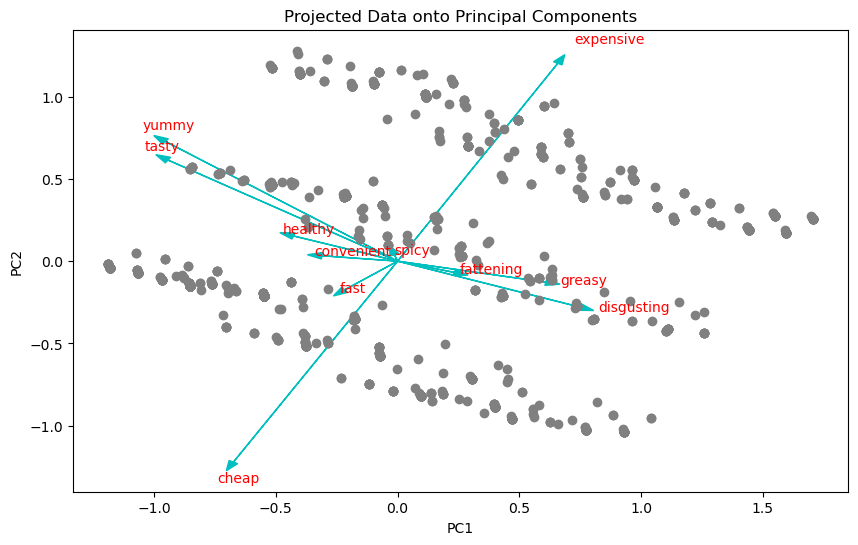

In [11]:
# Projected data onto the principal components

plt.figure(figsize=(10,6))
pca_proj = pca.fit_transform(df_x) # obtain the coordinates of each data point in the new coordinate system

# Adding arrows for original segmentation variables
for i, txt in enumerate(df_x.columns):
    plt.arrow(0, 0, pca.components_.T[i, 0]*2, pca.components_.T[i, 1]*2, head_width=0.04, color='c')
    plt.text(pca.components_.T[i, 0]*2.2, pca.components_.T[i, 1]*2.2, txt, color='r')

# Plotting the projected data
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], color='grey')   
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Data onto Principal Components')
plt.show()

# Extracting Segments

#  Using k-Means

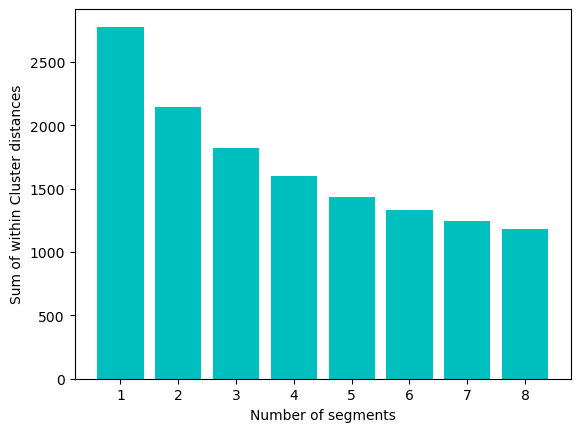

In [12]:
# Fixing the random data generation
np.random.seed(1234)

# Performing K-Means clustering with 10 random restarts for each number of segments (from 1 to 8)

distortions = []    
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df_x)         # Fits the kmeans model to the df1 dataframe
    distortions.append(kmeans.inertia_)   
    
# Plotting the scree plot 
plt.bar(range(1, 9), distortions,color="c")
plt.xlabel('Number of segments')
plt.ylabel('Sum of within Cluster distances')
plt.show()


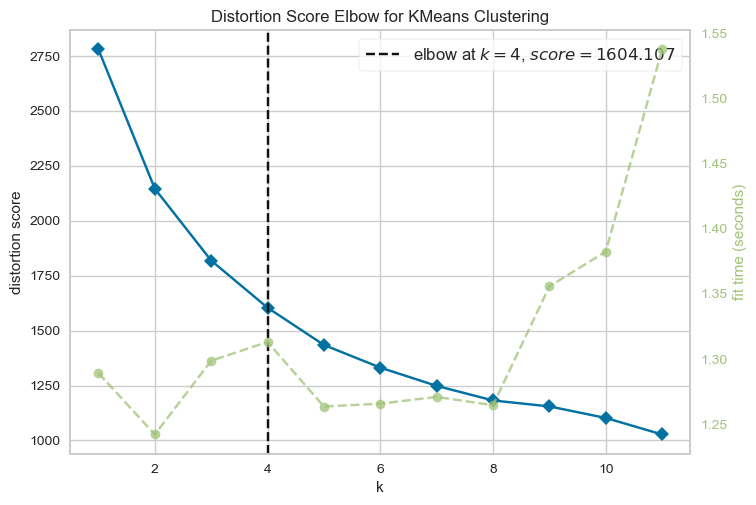

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(df_x)
visualizer.show()

In [14]:
#K-means clustering
kmeans = KMeans(n_clusters=4, n_init=10, init='k-means++', random_state=1234).fit(df_x)
df['Cluster_Num'] = kmeans.labels_    #  Adding cluster numbers to the dataframe
print (kmeans.labels_)       # Labels assigned for each data point
print (kmeans.inertia_) # Sum of Squared distance of the data 
print(kmeans.n_iter_)   
print(kmeans.cluster_centers_)  # Location of the centroids in each cluster 

[1 3 3 ... 3 0 2]
1604.1072915407908
9
[[0.98050682 0.98245614 0.10331384 0.79532164 0.38791423 0.96101365
  0.9785575  0.98050682 0.04873294 0.37621832 0.06432749]
 [0.01912568 0.90710383 0.09016393 0.92076503 0.59562842 0.95628415
  0.91803279 0.28961749 0.02185792 0.07650273 0.32786885]
 [0.02066116 0.67355372 0.07438017 0.91735537 0.7107438  0.74380165
  0.0661157  0.08677686 0.89669421 0.06198347 0.71900826]
 [0.86746988 0.96385542 0.09638554 0.88253012 0.53012048 0.85843373
  0.04819277 0.92168675 0.81325301 0.15963855 0.07831325]]


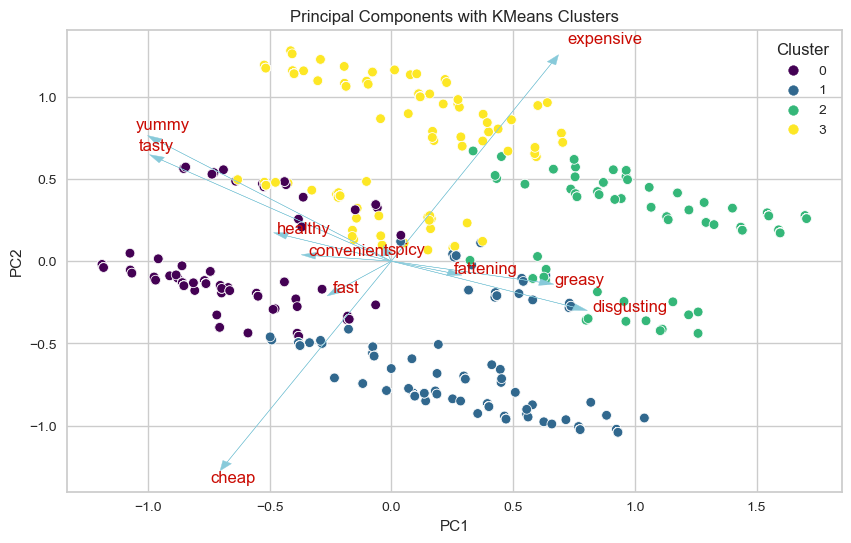

In [15]:
# Creating a DataFrame with the first two principal components
pf = pd.DataFrame(pca_proj[:, :2], columns=['pc1', 'pc2'])

# Adding cluster labels to the DataFrame
pf['Cluster'] = kmeans.labels_

# Visualization of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue="Cluster", palette='viridis', legend='full')

for i, txt in enumerate(df_x.columns):
    plt.arrow(0, 0, pca.components_.T[i, 0]*2, pca.components_.T[i, 1]*2, head_width=0.04, color='c')
    plt.text(pca.components_.T[i, 0]*2.2, pca.components_.T[i, 1]*2.2, txt, color='r')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components with KMeans Clusters')
plt.show()


# Describing Segments

# i)Cross-tabulation Plot of Cluster & Likeness

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
df["Like"] = df["Like"].replace({"I hate it!-5":-5,"-4":-4,"-3":-3,"-2":-2,"-1":-1,"0":0,"+1":+1,"+2":+2,"+3":+3,"+4":+4,"I love it!+5":+5})

# Creating a Cross-Tab of cluster labels and 'Like' 
data_like = pd.crosstab(df["Cluster_Num"], df["Like"])
data_like

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
Cluster_Num,,,,,,,,,,,
0,2,3,0,5,7,32,45,76,134,107,102
1,56,38,37,30,31,67,48,40,16,3,0
2,89,27,31,18,12,36,14,7,8,0,0
3,5,3,5,6,8,34,45,64,71,50,41


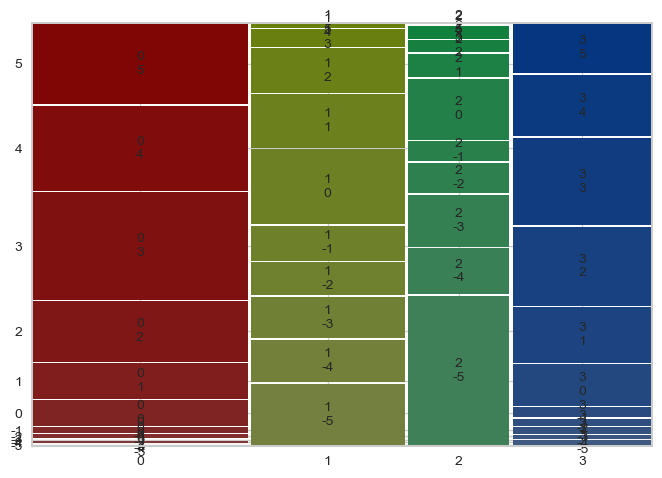

In [17]:
# Create the mosaic plot
mosaic(data_like.stack())
plt.show()

# ii)Cross-tabulation Plot of Cluster & Gender

In [18]:
# Creating a DataFrame with the cluster labels and "Gender"
data_gender=pd.crosstab(df['Cluster_Num'],df['Gender'])
data_gender

Gender,Female,Male
Cluster_Num,,
0,309,204
1,213,153
2,101,141
3,165,167


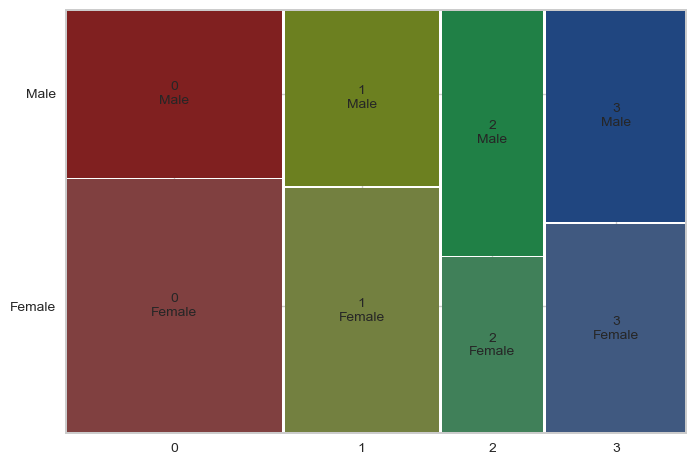

In [19]:
# Create the mosaic plot
mosaic(data_gender.stack())
plt.show()

# iii)Box-Plot of Cluster & Age 

<Axes: xlabel='Cluster_Num', ylabel='Age'>

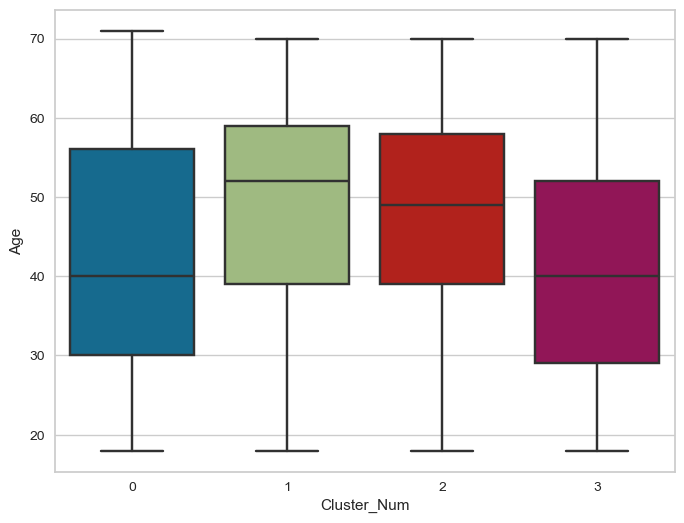

In [20]:
# Box plot for age
plt.figure(figsize=(8, 6))
sns.boxplot(x="Cluster_Num", y="Age", data=df)

# Selecting the Target Segment

# a)Visit frequency

In [21]:
from sklearn.preprocessing import LabelEncoder

# Using labelEncoder to convert the categorical labels into integers
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])

visit_frequency = df.groupby('Cluster_Num')['VisitFrequency'].mean()   # Grouping by clusters and taking their average
visit_frequency = visit_frequency.to_frame().reset_index()    # Converting the obtained value to a dataframe 
visit_frequency

,Cluster_Num,VisitFrequency
0,0,2.614035
1,1,2.718579
2,2,2.706612
3,3,2.536145


# b)Likeness

In [22]:
like = df.groupby('Cluster_Num')['Like'].mean()   # Grouping by clusters and taking their average
like = like.to_frame().reset_index()   
like

,Cluster_Num,Like
0,0,2.920078
1,1,-1.218579
2,2,-2.652893
3,3,2.165663


# c)Gender

In [23]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
gender = df.groupby('Cluster_Num')['Gender'].mean()   # Grouping by clusters and taking their average
gender = gender.to_frame().reset_index()    # Converting the obtained value to a dataframe 
gender

,Cluster_Num,Gender
0,0,0.397661
1,1,0.418033
2,2,0.582645
3,3,0.503012


In [24]:
combined = gender.merge(visit_frequency, on="Cluster_Num", how="left").merge(like, on="Cluster_Num", how="left")
combined

,Cluster_Num,Gender,VisitFrequency,Like
0,0,0.397661,2.614035,2.920078
1,1,0.418033,2.718579,-1.218579
2,2,0.582645,2.706612,-2.652893
3,3,0.503012,2.536145,2.165663


# Target Segment 

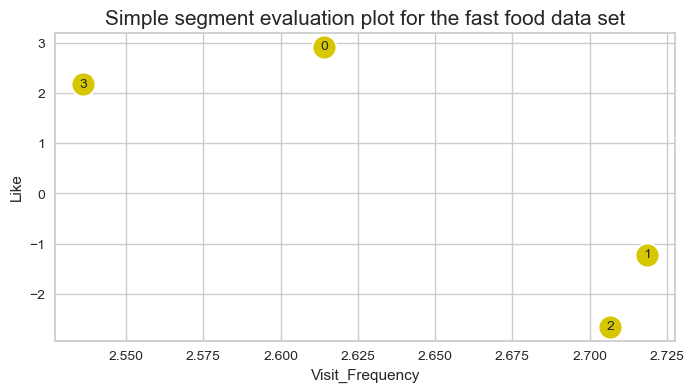

In [25]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = "VisitFrequency", y = "Like", data=combined, s=300, color="y")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
# Adding values to the scattered data points
for i in range(len(combined)):
    plt.text(combined["VisitFrequency"][i], combined["Like"][i], combined.index[i], ha='center', va='center', fontsize=10)
plt.xlabel("Visit_Frequency") 
plt.ylabel("Like") 
plt.show()